In [4]:
import pandas as pd
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
from fbprophet import Prophet



In [5]:
pyo.init_notebook_mode(connected=True) # connect to jupyter notebook
cf.go_offline() # we can use them offline


In [6]:
df=pd.read_excel(r"D:\python\Datasets\Covid cases in India.xlsx") # read the excel file where df stands for dataframe

In [7]:
df = pd.read_csv(r'D:\python\Datasets\covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)


In [8]:
df.groupby('Date').sum().head()
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

In [17]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [18]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
56 2020-03-18
57 2020-03-19
58 2020-03-20
59 2020-03-21
60 2020-03-22

In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds           yhat     yhat_lower     yhat_upper
56 2020-03-18  148703.893313  132680.425848  164609.382486
57 2020-03-19  152585.478705  137205.862398  168828.663711
58 2020-03-20  157365.812683  140752.249925  173384.694389
59 2020-03-21  161049.269158  146463.384679  176126.711598
60 2020-03-22  165066.852886  149577.881890  179860.920242

NUMBER OF PERSONS VS DATE GRAPH TO FORECAST THE CONFIRMED CASES OF THE CORONA VIRUS 


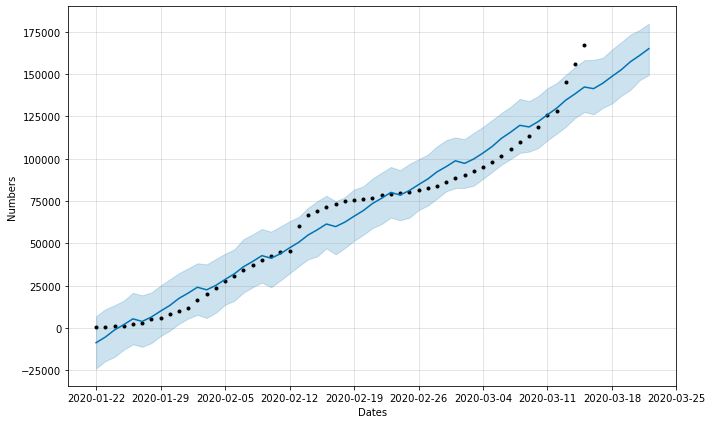

In [34]:
confirmed_forecast_plot = m.plot(forecast,plot_cap="Forecasting Corona Cases",xlabel="Dates",ylabel="Numbers")

In [ ]:
print("NUMBER OF PERSONS VS DATE GRAPH TO FORECAST THE CONFIRMED CASES OF THE CORONA VIRUS WEEKLY ")

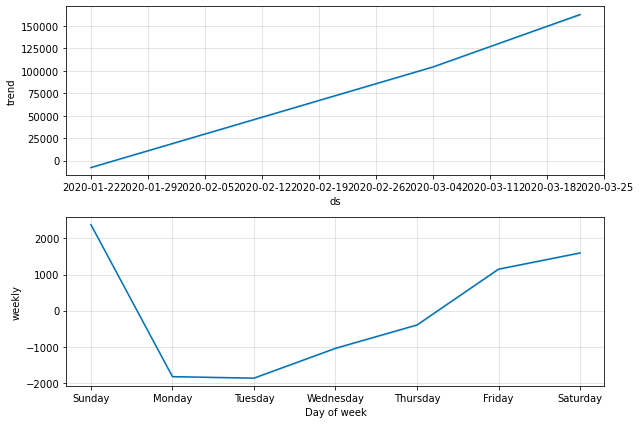

In [29]:

confirmed_forecast_plot =m.plot_components(forecast)

In [23]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()

In [34]:
def display():
    print("Connection success")

Exception in thread Thread-10:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\anvil\server.py", line 306, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "D:\Anaconda\lib\site-packages\anvil\server.py", line 298, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "D:\Anaconda\lib\site-packages\anvil\_threaded_server.py", line 403, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "D:\Anaconda\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda\lib\site-packages\anvil\server.py", line 143, in heartbeat_until_reopened
    call("anvil.private.echo", "keep-ali

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [25]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [26]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
56 2020-03-18
57 2020-03-19
58 2020-03-20
59 2020-03-21
60 2020-03-22

In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
56 2020-03-18  6138.426077  5743.042563  6528.300060
57 2020-03-19  6317.279964  5942.765602  6714.133847
58 2020-03-20  6547.994985  6192.211173  6969.530183
59 2020-03-21  6770.710027  6348.545181  7158.345909
60 2020-03-22  7011.342323  6573.373251  7413.434645

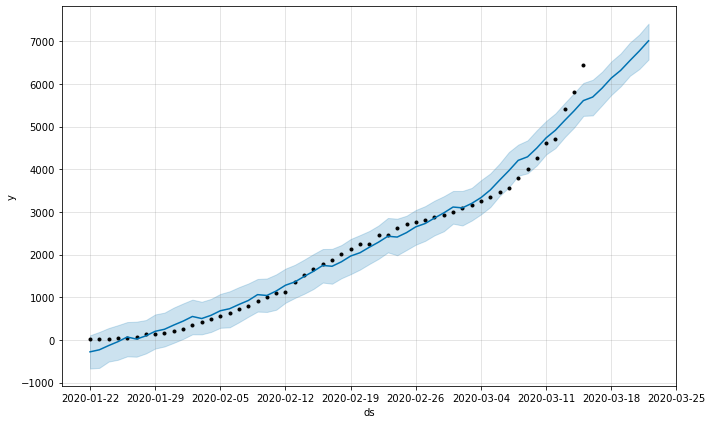

In [28]:
deaths_forecast_plot = m.plot(forecast)

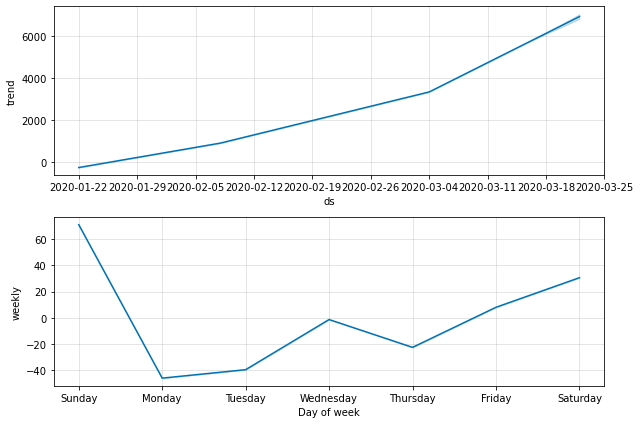

In [31]:
deaths_forecast_plot = m.plot_components(forecast)

In [30]:
import anvil.media
@anvil.server.callable
def filemani():
    df=pd.read_excel(r"D:\python\Datasets\Covid cases in India.xlsx")
    df = pd.read_csv(r'D:\python\Datasets\covid_19_data.csv',parse_dates=['Last Update'])
    df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
    df_confirmed = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_confirmed.csv")
    df_recovered = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_recovered.csv")
    df_deaths = pd.read_csv(r"D:\python\Datasets\time_series_covid_19_deaths.csv")
    df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
    df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
    df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
    df.groupby('Date').sum().head()
    confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
    confirmed.columns = ['ds','y']
    confirmed['ds'] = pd.to_datetime(confirmed['ds'])
    m = Prophet(interval_width=0.95)
    m.fit(confirmed)
    future = m.make_future_dataframe(periods=7)
    future.tail()
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    confirmed_forecast_plot = m.plot(forecast)
    